In [5]:
import sys
import scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [6]:
rawdata = pd.DataFrame(pd.read_csv('incident.csv', index_col='number'))
#index_col sets the index column to something other than the normal numerical sequence 
#calendar duration is in minutes 
rawdata.head()

,incident_state,opened_at,caller_id,short_description,sys_updated_on,assignment_group,calendar_duration,closed_by
number,,,,,,,,
INC0000000a,Closed,2014-07-14 17:59:09,Patrick Brown (pab26),Urgent Workstation Issue DUH or CHC,2014-07-26 00:12:03,Device Support-DHTS Reg6-SE,45667,NaN
INC0000006,Closed,2012-05-06 09:52:41,Christopher Smith (smittyc),ServiceNow initial incident.,2012-05-08 00:01:10,Support@Duke (ServiceNow App Support),137309,NaN
INC0000008,Closed,2012-05-06 10:02:01,Christa Abedi (ca102),New employee hire,2012-05-09 00:04:07,[i]Device Support-DRaH,223326,NaN
INC0000009,Closed,2012-05-06 10:03:27,Kirk Rouser (kjr10),Test Email from Kirk,2012-05-08 00:01:03,Service Desk-OIT,136656,NaN
INC0000013,Closed,2012-05-06 10:06:27,Jeff Gentry (gentr066),Test ticket,2012-05-06 10:46:32,Service Desk-Level 1-DRH,2405,Jeff Gentry (gentr066)


In [7]:
closed_cases = pd.DataFrame(rawdata[rawdata['incident_state'] == "Closed"])
#Need to only look at solved cases! 
closed_cases.head() # don't use print statements, just name of dataframe shows in tables
#calendar_duration currently shows number of seconds! 

,incident_state,opened_at,caller_id,short_description,sys_updated_on,assignment_group,calendar_duration,closed_by
number,,,,,,,,
INC0000000a,Closed,2014-07-14 17:59:09,Patrick Brown (pab26),Urgent Workstation Issue DUH or CHC,2014-07-26 00:12:03,Device Support-DHTS Reg6-SE,45667,NaN
INC0000006,Closed,2012-05-06 09:52:41,Christopher Smith (smittyc),ServiceNow initial incident.,2012-05-08 00:01:10,Support@Duke (ServiceNow App Support),137309,NaN
INC0000008,Closed,2012-05-06 10:02:01,Christa Abedi (ca102),New employee hire,2012-05-09 00:04:07,[i]Device Support-DRaH,223326,NaN
INC0000009,Closed,2012-05-06 10:03:27,Kirk Rouser (kjr10),Test Email from Kirk,2012-05-08 00:01:03,Service Desk-OIT,136656,NaN
INC0000013,Closed,2012-05-06 10:06:27,Jeff Gentry (gentr066),Test ticket,2012-05-06 10:46:32,Service Desk-Level 1-DRH,2405,Jeff Gentry (gentr066)


In [8]:
closed_cases.tail()

,incident_state,opened_at,caller_id,short_description,sys_updated_on,assignment_group,calendar_duration,closed_by
number,,,,,,,,
INC0013002,Closed,2012-05-15 11:01:53,Conner Belvin (wb48),NetID password reset,2012-05-26 00:00:36,Service Desk-Level 1-DHTS,910723,NaN
INC0013004,Closed,2012-05-15 11:02:23,Cynthia Dallura (cd46),install/configure scanner,2012-05-26 00:09:59,Service Desk-DOM-SOM,911256,NaN
INC0013006,Closed,2012-05-15 11:02:31,Barry Foster (foste020),DHE Account Reset,2012-05-26 00:04:35,Service Desk-Level 1-DHTS,910924,NaN
INC0013009,Closed,2012-05-15 11:03:21,Michelle Carter (carte040),Customer states that she is unable to type an ...,2012-05-26 00:01:47,Service Desk-Level 1-DHTS,910706,NaN
INC0013011,Closed,2012-05-15 11:04:19,Bernice Justice (just1),"Self Service submission for 'Phone, Line, Jack...",2012-05-28 00:02:07,Network Services-Jack-DHTS,1083468,NaN


In [9]:
closed_cases['calendar_duration'] = closed_cases['calendar_duration'] / 3600 #to get number of hours
closed_cases.head() 

,incident_state,opened_at,caller_id,short_description,sys_updated_on,assignment_group,calendar_duration,closed_by
number,,,,,,,,
INC0000000a,Closed,2014-07-14 17:59:09,Patrick Brown (pab26),Urgent Workstation Issue DUH or CHC,2014-07-26 00:12:03,Device Support-DHTS Reg6-SE,12.685278,NaN
INC0000006,Closed,2012-05-06 09:52:41,Christopher Smith (smittyc),ServiceNow initial incident.,2012-05-08 00:01:10,Support@Duke (ServiceNow App Support),38.141389,NaN
INC0000008,Closed,2012-05-06 10:02:01,Christa Abedi (ca102),New employee hire,2012-05-09 00:04:07,[i]Device Support-DRaH,62.035000,NaN
INC0000009,Closed,2012-05-06 10:03:27,Kirk Rouser (kjr10),Test Email from Kirk,2012-05-08 00:01:03,Service Desk-OIT,37.960000,NaN
INC0000013,Closed,2012-05-06 10:06:27,Jeff Gentry (gentr066),Test ticket,2012-05-06 10:46:32,Service Desk-Level 1-DRH,0.668056,Jeff Gentry (gentr066)


In [10]:
closed_cases.describe()

,calendar_duration
count,9998.000000
mean,422.552856
std,1338.100030
min,0.010278
25%,248.546528
50%,253.915000
75%,278.158819
max,38465.432222


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1125bf0d0>]], dtype=object)

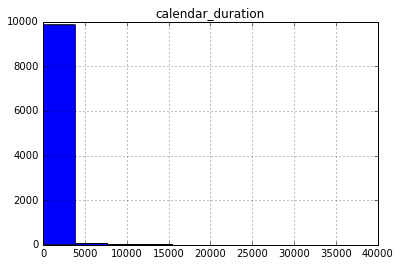

In [11]:
#plt.scatter(closed_cases.number, closed_cases.calendar_duration)
closed_cases.hist()

In [ ]:
closed_cases = pd.DataFrame(rawdata[rawdata['incident_state'] == "Closed"])
